<a href="https://colab.research.google.com/github/zinebzannouti/Data-Preparation/blob/main/3-Data%20Transformation/Workshop/3_Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Transformation**

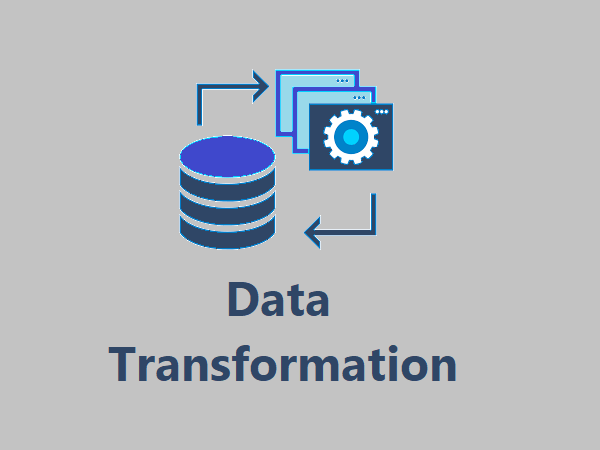

# **Replacing Values**

- Jusqu'à présent, vous n'avez travaillé qu'avec des données manquantes (NaN), mais il peut arriver que vous souhaitiez remplacer une valeur non nulle par une valeur différente.
- Ou peut-être qu'une valeur nulle est enregistrée comme un nombre aléatoire et doit donc être traitée comme NaN plutôt que comme un nombre.
- C'est là que la replace()fonction devient utile...

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.Series([1,2,-99,4,5,-99,7,8,-99])
data

0     1
1     2
2   -99
3     4
4     5
5   -99
6     7
7     8
8   -99
dtype: int64

In [5]:
# Replace the placeholder -99 as NaN
data.replace(-99, np.nan)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    NaN
6    7.0
7    8.0
8    NaN
dtype: float64

- Vous ne verrez plus le -99, car il est remplacé par NaN et donc non représenté.
- De même, vous pouvez transmettre plusieurs valeurs à remplacer.
- Pour ce faire, nous allons créer une autre série, puis concaténer la série de données d'origine avec la nouvelle série, puis appliquer la fonction de remplacement de valeurs multiples.

# **Concaténation de la série Pandas**
Pour ce faire, nous pouvons utiliser la concat()fonction dans pandas. Pour continuer l'indexation après avoir appliqué la concaténation, vous pouvez ignore_index = Truelui passer l'argument.

In [6]:
# Create a new Series
new_data = pd.Series([-100, 11, 12, 13])
combined_series = pd.concat([data, new_data], ignore_index = True)
combined_series

0       1
1       2
2     -99
3       4
4       5
5     -99
6       7
7       8
8     -99
9    -100
10     11
11     12
12     13
dtype: int64

In [7]:
# Let's replace -99 and -100 as NaN in the new combined_series
data_replaced = combined_series.replace([-99, -100], np.nan)
data_replaced

0      1.0
1      2.0
2      NaN
3      4.0
4      5.0
5      NaN
6      7.0
7      8.0
8      NaN
9      NaN
10    11.0
11    12.0
12    13.0
dtype: float64

In [8]:
# Argument passed can also be a dictionary with separate values
data_replaced = combined_series.replace({-99: np.nan, -100: 0})

# Same as: new_data.replace([-99, -100], [np.nan, 0])
data_replaced

0      1.0
1      2.0
2      NaN
3      4.0
4      5.0
5      NaN
6      7.0
7      8.0
8      NaN
9      0.0
10    11.0
11    12.0
12    13.0
dtype: float64

# **Ajout de connaissances - Fonction Map**
- Dans certaines situations, vous voudrez peut-être ajouter plus d'informations à ce que vous avez déjà en vous basant sur une certaine logique.
- C'est à ce moment que vous pouvez vous aider de cartes et d'une combinaison de fonctions pour obtenir ce que vous voulez.
- La logique peut devenir plus compliquée, mais essayez de comprendre à l'aide de cet exemple.

- Disons que vous avez une base de données de nombres mappée à son nombre correspondant en anglais.

In [9]:
data_number = pd.DataFrame({'english': ['zero','one','two','three','four','five'],
'digits': [0,1,2,3,4,5]})
data_number

,english,digits
0,zero,0
1,one,1
2,two,2
3,three,3
4,four,4
5,five,5


- Supposons que vous vouliez maintenant ajouter une autre colonne indiquant les multiples de deux comme "Oui" et le reste comme "Non".
- Vous pouvez écrire un mappage de chaque appel anglais distinct à son "Oui" ou "Non" correspondant.



In [10]:
english_to_multiple = {
    'two': 'yes',
    'four': 'yes'
}

- Ensuite, vous pouvez appeler la fonction map pour ajouter la colonne lorsque la colonne anglaise est un multiple de 2. Qu'est-ce qui est rempli dans les autres colonnes de nombres non multiples ? 

In [11]:
data_number['multiple'] = data_number['english'].map(english_to_multiple)
data_number

,english,digits,multiple
0,zero,0,NaN
1,one,1,NaN
2,two,2,yes
3,three,3,NaN
4,four,4,yes
5,five,5,NaN


- Les autres colonnes sont remplies de valeurs NaN et vous savez déjà comment travailler davantage avec les valeurs manquantes.
- C'était un exemple simple.
- Mais j'espère que vous pourrez trouver l'inspiration pour utiliser des idées d'ici pour utiliser la fonction de carte pour faire plus de choses et l'utiliser dans vos cas d'utilisation spécifiques.

# **Discrétisation - Fonction Cut**
- Parfois, vous souhaiterez peut-être catégoriser en fonction d'une certaine logique et placer toutes les données dans des compartiments ou des bacs discrets à des fins d'analyse.
- Vous pouvez utiliser la cut()fonction pour cela.
- Par exemple, créons d'abord un ensemble de données contenant 30 nombres aléatoires entre 1 et 100.

In [12]:
import random

data = random.sample(range(1, 101), 30)
data

[100,
 35,
 21,
 61,
 38,
 96,
 81,
 71,
 90,
 37,
 65,
 78,
 67,
 54,
 20,
 79,
 19,
 80,
 62,
 8,
 52,
 42,
 1,
 64,
 53,
 92,
 13,
 75,
 5,
 83]

- Disons que nous voulons les catégoriser en fonction d'un seau que nous définissons nous-mêmes : nombres entre 1 et 25, puis 25 - 35, 40 - 60, puis 60 - 80, puis le reste. Nous définissons donc un seau...

- Ensuite, nous utiliserons la fonction de cut .

In [13]:
# Defining the starting value for each bucket
bucket = [1, 25, 35, 60, 80, 100]

cut_data = pd.cut(data, bucket)
cut_data

[(80, 100], (25, 35], (1, 25], (60, 80], (35, 60], ..., (80, 100], (1, 25], (60, 80], (1, 25], (80, 100]]
Length: 30
Categories (5, interval[int64, right]): [(1, 25] < (25, 35] < (35, 60] < (60, 80] < (80, 100]]

# **Variables factices et encodages One-Hot**
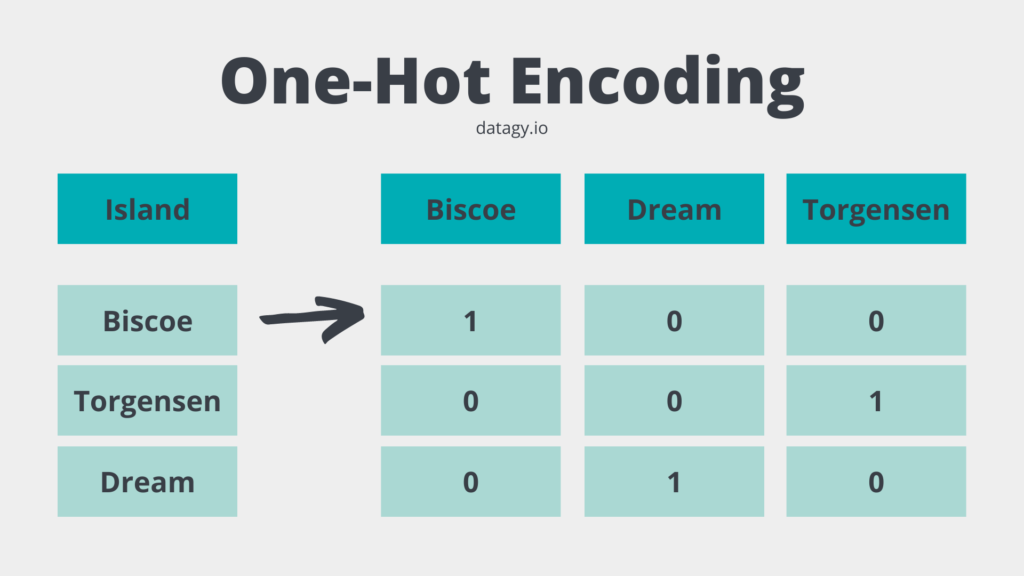
- Cette rubrique est particulièrement utile lorsque vous souhaitez pouvoir convertir certaines données catégorielles en valeurs numériques afin de pouvoir les utiliser dans votre modèle d'analyse de données.
- Ceci est particulièrement pratique, en particulier lors de la modélisation d'apprentissage automatique, où le concept d'encodage à chaud est célèbre. En utilisant des termes plus techniques :
- le codage à chaud est le processus de conversion de valeurs catégorielles en un vecteur numérique unidimensionnel.

- Une façon de faire cela en utilisant pandas est d'utiliser la get_dummies()fonction.
- Si une colonne de votre dataframe a 'n' valeurs distinctes, la fonction dérivera une matrice avec 'n' colonnes contenant tous les 1 et 0.
- Voyons cela avec un exemple pour mieux saisir le concept...

In [14]:
# Creating a DataFrame consiting individual characters in the list
data = pd.Series(list('abcdababcdabcd'))
data

0     a
1     b
2     c
3     d
4     a
5     b
6     a
7     b
8     c
9     d
10    a
11    b
12    c
13    d
dtype: object

- Supposons maintenant que vous souhaitiez disposer de vecteurs individuels indiquant l'apparence de chaque caractère pour l'alimenter en fonction.

- Quelque chose comme ceci : pour 'a' = [1,0,0,0,1,0,1,0,0,0,1,0,0,0] où 1 est à la position où 'a' existe et 0 là où ce n'est pas le cas.
- L'utilisation de la get_dummies()fonction facilitera la tâche.

In [15]:
pd.get_dummies(data)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,0,0,1
